# Sympy-interlude

---

La oss gjøre noe spennende med det vi har lært her. Newtons metode er, som du sikkert husker fra IN-KJM1900 eller IN1900, en oppskrift på å finne røtter i jevne funksjoner $f(x)$. Det betyr at vi vil bestemme en $x_*$, sånn at 

$$f(x_*) = 0$$

I praksis innebærer dette å gjette på en initiell $x_0$, hvorpå vi gjør følgende operasjon:

$$ x_{n+1} = x_{n} - \frac{f(x_n)}{f'(x_{n})}$$

Vi fortsetter deretter å gjøre dette inntil vi når et øvre antall iterasjoner, eller at funksjonsverdien i punktet $x_n$ er tilstrekkelig nær null:

$$\vert f(xn+1) \vert \le \epsilon $$

Dette siste kalles en *konvergensbetingelse*. Det kunne for eksempel også vært at differansen mellom $x_n$ og $x_{n+1}$ hadde vært under en gitt terskelverdi:

$$ \vert x_n - x_{n+1} \vert \le \epsilon$$

Prøv gjerne litt selv med applikasjonen under:

In [1]:
# Import required modules:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from IPython.display import display

def newtons_method(f, x0, dx = 0.01, maxiter = 10, eps = 0.001):
    """
    Simple center-difference based Newtons method example
    
    f  = input function (lambda function)
    x0 = initial guess
    dx = discrete step (optional)
    
    """
    
    x_prev = x0 #set previous value
    
    x_list = [x_prev]
    for i in np.arange(maxiter):
        # Approximate derivative in x_prev using 
        # center difference : 
        # D f(x_n) = (f(x_{n+1}) - f(x_{n}))/(2*dx) 
        dfdx = (f(x_prev+dx) - f(x_prev-dx))/(2*dx) 
       
        # Compute root of tangent line in x_prev
        x_new = -f(x_prev)/dfdx + x_prev 
        
        # Test for convergence
        if np.abs(x_prev-x_new)<=eps:
            break #halt iterations when converged
            
        x_prev = x_new*1 #Update root approximation
        
        x_list.append(x_new) #Append to list (for visualizaztion)
    return x_new, np.array(x_list), i #return values

def newton_widget(x0, maxiter):
    """
    Helper-function for visualization and 
    interaction with newtons_method-function
    f  = input function
    x0 = initial guess
    """
    # Try one of these functions, or make your own:
    f = lambda x : np.sin(5*x)*(x-.5)*np.exp(-1.1*x**2) #*x*(x-1.0)*(x-0.5)
    #f = lambda x : x*(x-.5)*(x-.9)**2
    
    #Perform Newton iterations
    x_final, x_list, N_iter = newtons_method(f, x0, maxiter = maxiter) 
    
    # plot results
    plt.figure(1, figsize = (10,8)) 
    
    # plot every iteration
    for i in np.arange(len(x_list)-1):
        plt.plot([x_list[i], x_list[i]], [0, f(x_list[i])], color = (.5,0,0), alpha = .5)
        plt.plot([x_list[i], x_list[i+1]], [f(x_list[i]),0], color = (.5,0,0), alpha = .5)
        plt.text(x_list[i], 0, "$x_%i$" %i)
        plt.text(x_list[i], f(x_list[i]), "$f(x_%i)$" %i)
    
    # Mark root 
    plt.text(x_list[-1], 0, "$x_*$")
    
    # Plot zero line 
    plt.plot([-2,2], [0,0], "-", color = (0,0,0), alpha = .1)
    
    # Plot original function
    x = np.linspace(-2, 2, 100)
    plt.plot(x,f(x), alpha = .2, label ="$f(x)$")
    plt.title("Newton iterations")
    plt.xlabel("x")
    #plt.xlim(x_list.min()-.2, x_list.max()+.2)
    plt.show()    
    
    
#newton_widget(0.2, 2)
y = interactive(newton_widget, x0 = (-1.8,1.8,.0001), maxiter = (1,10,1)) 
display(y)

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.8, min=-1.8, step=0.0001), IntSlider(valu…

## Newtons metode i høyeredimensjonale rom

Vi kan generalisere Newtons metode for høyeredimensjonale rom. Vi søker nå en vektor $\mathbf{x}_*$, sånn at 

$$
\mathbf{f}(\mathbf{x}_*) = \mathbf{0}.
$$

Legg merke til at $\mathbf{0}$ er null-vektoren (ikke en skalar)

Vi må nå gjette på en $\mathbf{x}_0$, og deretter gjøre følgende operasjon

$$
\mathbf{x}_{n+1} = \mathbf{x}_{n} - J^{-1}(\mathbf{x}_n) \mathbf{f}(x_n),
$$

hvor 


$$
J=\left[\begin{array}{ccc}
\dfrac{\partial \mathbf{f}(\mathbf{x})}{\partial x_{1}} & \cdots & \dfrac{\partial \mathbf{f}(\mathbf{x})}{\partial x_{n}}
\end{array}\right]=\left[\begin{array}{c}
\nabla^{T} f_{1}(\mathbf{x}) \\
\vdots \\
\nabla^{T} f_{m}(\mathbf{x})
\end{array}\right]=\left[\begin{array}{ccc}
\dfrac{\partial f_{1}(\mathbf{x})}{\partial x_{1}} & \cdots & \dfrac{\partial f_{1}(\mathbf{x})}{\partial x_{n}} \\
\vdots & \ddots & \vdots \\
\dfrac{\partial f_{m}(\mathbf{x})}{\partial x_{1}} & \cdots & \dfrac{\partial f_{m}(\mathbf{x})}{\partial x_{n}}
\end{array}\right]
$$

er <a href="https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant">Jacobi-matrisen</a>.


# Sympy-implementasjon

Så du oppdager sikkert fort at det blir litt uhåndterlig når funksjonene våre har mange og kompliserte komponenter, rett og slett for det blir så lett å gjøre bokføringsfeil; et minus her, en faktor 2 der, og plutselig får vi bare merkelige svar. Her kan sympy være redningen, selv om du i aller høyeste grad bør holde fokus på hva du driver med.

La oss undersøke en funksjon:

$$
F(x,y) = \sin(x^2)\cos(y)(1-y)
$$

Hvor er dens deriverte lik null? Altså hvor er

$$
\nabla F(x,y) = \frac{\partial}{\partial x} f(x,y) \hat{i} + \frac{\partial}{\partial x} f(x,y) \hat{j} := \mathbf{f}(x,y) = \mathbf{0}
$$

?

Newtons metode kan gi oss svaret:

In [66]:
from IPython.display import display
import numpy as np
import sympy as sp

x,y = sp.symbols("x y")

F = sp.sin(x**2)*sp.cos(y)*(1-y)
F = sp.cos(x)*sp.cos(y)*x*y

df_dx = sp.diff(F, x)
df_dy = sp.diff(F, y)

display(df_dx, df_dy) #vis vektorkomponentene til f

-x*y*sin(x)*cos(y) + y*cos(x)*cos(y)

-x*y*sin(y)*cos(x) + x*cos(x)*cos(y)

In [67]:
# lag en evaluerbar funksjon for f

df_dx_ = sp.lambdify((x,y), df_dx,  "numpy")
df_dy_ = sp.lambdify((x,y), df_dy, "numpy")
def f(x):
    return np.array([df_dx_(*x), df_dy_(*x)])


print(f(np.array([0,0]))) #test i (0,0)

[0. 0.]


In [68]:
# lag en evaluerbar 2x2 Jacobi-matrise

ddf_dxx = sp.lambdify((x,y), sp.diff(F, x, order = 2) , "numpy")
ddf_dxy = sp.lambdify((x,y), sp.diff(sp.diff(F, x), y), "numpy")
ddf_dyy = sp.lambdify((x,y), sp.diff(F, y, order = 2), "numpy")
ddf_dyx = sp.lambdify((x,y), sp.diff(sp.diff(F, y), x), "numpy")

def J(x):
    return np.array([[ddf_dxx(*x), ddf_dxy(*x)],[ddf_dyx(*x), ddf_dyy(*x)]])

print(J(np.array([.2,.1]))) #test i 0,0

[[0.0935635 0.9262473]
 [0.9262473 0.1930772]]


In [79]:
# implementer Newtons metode

def newtons_method_2d(f, J, x, maxiter = 30, eps = 0.0000001):
    
    for i in np.arange(maxiter):
        x = x - np.linalg.pinv(J(x)).T.dot(f(x))
        if np.sum( (f(x)-0*x)**2 )**.5 <eps:
            break
        
    
    return x, i #returner verdier
    
x, i = newtons_method_2d(f, J, np.array([.1,.1]))


# sjekk at det virker
print("Fant x* =", x, " etter ", i, " iterasjoner, med f(x) =", f(x))


Fant x* = [4.49089085e-09 4.49089085e-09]  etter  2  iterasjoner, med f(x) = [4.49089085e-09 4.49089085e-09]


## Newton-Rhapson fraktaler

Vi kan omsider bruke metoden til å gjøre noe spennende. Hvor mange iterasjoner kreves det for å konvergere fra ulike startgjett? La oss sjekke en grid i x-y planet:

In [86]:
import matplotlib.pyplot as plt

Nx = 200 #oppløsning

z = np.zeros((Nx,Nx), dtype = float)


x = np.linspace(-1,1,Nx)
for i in range(Nx):
    for j in range(Nx):
        z[i,j] = newtons_method_2d(f,J, np.array([x[i], x[j]]))[1]
        


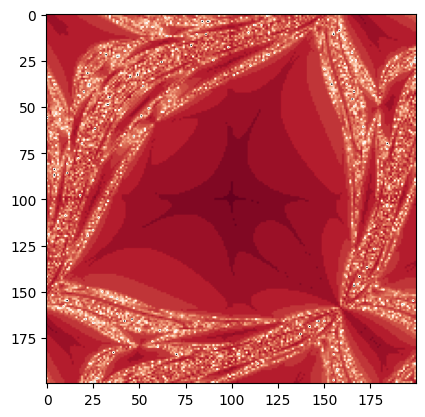

In [87]:
plt.imshow(z, cmap = "RdGy")